In [1]:
import numpy as np 
import pandas as pd 

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [62]:
#Getting data
train_df = pd.read_csv('train.csv')
print(train_df.shape)
ntrain=train_df.shape[0]
train_df.head()

(7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [61]:
test_df = pd.read_csv('test.csv')
print(test_df.shape)
test_df.head()

(3263, 4)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [63]:
ids=test_df['id']
train_df.drop(columns='id',inplace=True)
test_df.drop(columns='id',inplace=True)

In [5]:
alldata_df=pd.concat((train_df,test_df)).reset_index(drop=True)

In [6]:
alldata_df.head(10)

,keyword,location,target,text
0,NaN,NaN,1.0,Our Deeds are the Reason of this #earthquake M...
1,NaN,NaN,1.0,Forest fire near La Ronge Sask. Canada
2,NaN,NaN,1.0,All residents asked to 'shelter in place' are ...
3,NaN,NaN,1.0,"13,000 people receive #wildfires evacuation or..."
4,NaN,NaN,1.0,Just got sent this photo from Ruby #Alaska as ...
5,NaN,NaN,1.0,#RockyFire Update => California Hwy. 20 closed...
6,NaN,NaN,1.0,#flood #disaster Heavy rain causes flash flood...
7,NaN,NaN,1.0,I'm on top of the hill and I can see a fire in...
8,NaN,NaN,1.0,There's an emergency evacuation happening now ...
9,NaN,NaN,1.0,I'm afraid that the tornado is coming to our a...


In [7]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

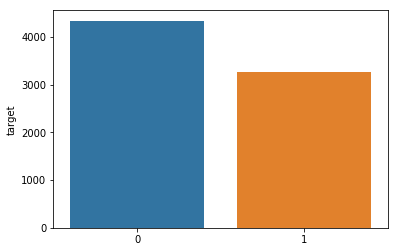

In [8]:
sns.barplot(x=train_df['target'].value_counts().index,y=train_df['target'].value_counts())

In [9]:
train_df.isnull().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
alldata_df['location'].value_counts()

USA                              141
New York                         109
United States                     65
London                            58
Canada                            42
                                ... 
we?it Û¢ ixwin                    1
Kuwait                             1
University of Maryland             1
#Capulets #5SOSfam #5quadfam       1
Sicamous, British Columbia         1
Name: location, Length: 4521, dtype: int64

In [11]:
alldata_df.replace({'United States':'USA',
                           'New York':'USA',
                            'New Jersey':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "San Francisco":'USA',
                            "Seattle, WA":'USA',
                            "Florida":'USA',
                            "San Diego, CA":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Denver, CO":'USA',
                            "Denver, Colorado":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India",
                            "Delhi":"India",
                            "World":"Worldwide",
                            "Manchester":'UK',
                            "Nashville, TN":'USA',
                            "Vancouver ":'Canada',
                            "Houston, TX ":"USA",
                            "Paterson, New Jersey ":'USA',
                            "Melbourne, Australia":'Australia',
                            "Dallas, TX":'USA',
                            "Calgary, Alberta":'Canada',
                            "Memphis, TN":'USA',
                            "Colorado, USA":'USA',
                            "US":'USA',
                            "Sacramento, CA":'USA',
                            "Colorado":'USA',
                            "Global": "Worldwide",
                            "Pennsylvania, USA":'USA',
                            'Austin, TX':'USA',
                            'Scotland':'UK',
                            'Maryland':'USA',
                            'Brooklyn, NY':'USA',
                            'worldwide':'Worldwide',
                            'Planet Earth':'Worldwide',
                            'Portland, OR':'USA',
                            'Texas, USA':'USA',
                            'Morioh, Japan':'Japan',
                            'Las Vegas':'USA',
                            'Charlotte, NC':'USA',
                            '304':'Worldwide',
                            'Sydney':'Australia',
                            'Sydney, Australia':'Australia',
                            'Oklahoma City, OK':'USA',
                            'Massachusetts':'USA',
                            'Indiana':'USA',
                            'Southern California':'USA',
                            ' Road to the Billionaires Club':'USA',
                            'Michigan':'USA',
                            'California, United States':'USA',
                            'Philadelphia, PA':'USA',
                            'Boston, MA':'USA',
                            'Newcastle':'UK',
                            'England':'UK',
                            'U.S.A.':'USA',
                            'Orlando, FL':'USA',
                            'Phoenix, AZ':'USA',
                            'Manhattan, NY':'USA',
                            'Columbus, OH':'USA',
                            'Arizona':'USA',
                            'San Diego':'USA',
                            'Florida, USA':'USA',
                            'london':'UK',
                            'Cleveland, OH':'USA',
                            'North Carolina, USA':'USA',
                            'NY':'USA',
                            'Liverpool':'UK',
                            'Melbourne':'Australia',
                            'Tennessee':'USA',
                            'Atlanta':'USA',
                            'New York, USA':'USA',
                            'Oakland, CA':'USA',
                            'WorldWide':'Worldwide',
                            'Wisconsin':'USA',
                            'Indianapolis, IN':'USA',
                            'Washington DC':'USA',
                            'Washington, DC':'USA',
                            'U.S.A':'USA',
                            'Toronto, Ontario':'Canada',
                            'Coventry':'UK',
                            'Las Vegas, Nevada':'USA',
                            'Portland, Oregon':'USA',
                            'Sydney, New South Wales':'USA',
                            'Manchester, England':'UK',
                            'Orlando':'USA',
                            'Toronto, Canada':'Canada',
                            'Baltimore, MD':'USA',
                            'Massachusetts, USA':'USA',
                            'Mumbai, Maharashtra':'India',
                            'Los Angeles, California':'USA',
                            'Hawaii, USA':'USA',
                            'Paignton':'USA',
                            'Calgary, AB':'Canada',
                            'Tampa, FL':'USA',
                            'Anchorage, AK':'USA',
                            'Washington State':'USA',
                            'Kansas City, MO':'USA',
                            'Atlanta Georgia':'USA',
                            'Vancouver, BC':'Canada',
                            'San Antonio, TX':'USA',
                            'Asheville, NC':'USA',
                            'The Netherlands':'Netherlands',
                            'Kansas City':'USA',
                            'New Jersey, USA':'USA',
                            'Lagos, Nigeria':'Nigeria',
                            'Lagos':'Nigeria',
                            'Pennsylvania':'USA',
                            'Atlanta Georgia':'Canada',
                            'New Hampshire':'USA',
                            'Las Vegas, NV':'USA',
                            'Birmingham':'UK',
                            'Austin, Texas':'USA',
                            'Cape Town':'South Africa',
                            'Tokyo':'Japan',
                            'San Jose, CA':'USA',
                            'Calgary':'Canada',
                            'Raleigh, NC':'USA',
                            'Midwest':'USA',
                            'Glasgow':'UK',
                            'Detroit, MI':'USA',
                            'Atlanta Georgia ':'Canada',
                            'Leeds, England':'UK',
                            'Edinburgh':'UK',
                            'St. Louis, MO':'USA',
                            'North Carolina':'USA',
                            'Oregon, USA':'USA',
                            'Rocky Mountains':'USA',
                            'Port Harcourt, Nigeria':'Nigeria',
                            'Haddonfield, NJ':'USA',
                            'Madison, WI':'USA',
                            'MI':'USA',
                            'Chicago, Illinois':'USA',
                            'America':'USA',
                            'World Wide':'Worldwide',
                            'Buffalo, NY':'USA',
                            'Virginia':'USA',
                            'Dubai, UAE':'UAE',
                            'Iraq|Afghanistan| RSA |Baghdad':'MiddleEast',
                            'Leicester':'UK',
                            'United States of America':'USA',
                            'U.S.':'USA',
                            'Miami, FL':'USA',
                            "Jakarta/Kuala Lumpur/S'pore":'Indonesia',
                            'Dublin, Ireland':'Ireland',
                            'British Columbia, Canada':'Canada',
                            'Calgary, Alberta, Canada':'Canada',
                            'New Delhi, Delhi':'India',
                            'mumbai':'India',
                            'Bend, Oregon':'USA',
                            'Seattle, Washington':'USA',
                            'Illinois, USA':'USA',
                            'Geneva':'Switzerland',
                            'Georgia':'USA',
                            'Memphis':'USA',
                            'Boston':'USA',
                            'Brazil':'Brasil',
                            'London UK':'UK',
                            'Oregon':'US',
                            'New York, New York':'USA',
                            'Houston':'USA',
                            'Connecticut':'USA',
                            'MA':'USA',
                            'Baton Rouge, LA':'USA',
                            'Sacramento':'USA',
                            'Nottingham, England':'UK',
                            'Rio de Janeiro':'Brasil',
                            'Nairobi-KENYA':'Africa',
                            'nyc':'USA',
                            'Auckland, New Zealand':'New Zealand',
                            'Vancouver, British Columbia':'Canada',
                            'Tennessee, USA':'USA',
                            'San Francisco Bay Area':'USA',
                            'New Orleans, LA':'USA',
                            'Adelaide, Australia':'Australia',
                            'Corpus Christi, Texas':'USA',
                            'Louisville, KY':'USA',
                            'Huntsville, AL':'USA',
                            'Hollywood, CA':'USA',
                            'Washington D.C.':'USA',
                            'Tulsa, Oklahoma':'USA',
                            'Roanoke, VA':'USA',
                            'Houston, TX':'USA',
                            'Nairobi':'Kenya',
                            'Victoria, British Columbia':'Canada',
                            'Sydney Australia':'Australia',
                            'Winston-Salem, NC':'USA',
                            'Virginia, USA':'USA',
                            'Alaska, USA':'USA',
                            '140920-21 & 150718-19 BEIJING':'China',
                            'Calgary, AB, Canada':'Canada',
                            'Victoria, BC':'USA',
                            'Karachi':'Pakistan',
                            'Milwaukee, WI':'USA',
                            'los angeles, ca':'USA',
                            'Arlington, TX':'USA',
                            'Edmonton':'Canada',
                            'Tulsa, OK':'USA',
                            'Brisbane':'Australia',
                            'Macclesfield':'UK',
                            'Ontario, Canada':'Canada',
                            'Ottawa':'USA',
                            'Haysville, KS':'USA',
                            'Chevy Chase, MD':'USA',
                            'Oklahoma City':'USA',
                            'Wales':'UK',
                            'Leesburg, FL':'USA',
                            'Islamabad':'Pakistan',
                            'Calgary, Canada':'Canada',
                            'Mumbai , India':'India',
                            'U.K.':'UK',
                            'Mesa, AZ':'USA',
                            'Baltimore':'USA',
                            'Jacksonville, FL':'USA',
                            'Abuja':'Nigeria',
                            'Karachi Pakistan':'Pakistan',
                            'Utah':'USA',
                            'Helsinki':'Finland',
                            'Dubai, United Arab Emirates':'UAE',
                            'Edmonton, Alberta':'Canada',
                            'Stockholm, Sweden':'Sweden',
                            'Johannesburg, South Africa':'South Africa',
                            'Vancouver':'Canada',
                            'State College, PA':'USA',
                            'Dubai':'UAE',
                            'Dundee':'UK',
                            'texas':'USA',
                            'California ':'USA',
                            'FCT, Abuja ':'Nigeria',
                            'Kolkata':'India',
                            'Desde Republica Argentina':'Argentina',
                            'New York':'USA',
                            'Durham, NC':'USA',
                            'Santa Cruz, CA':'USA',
                            'Alaska':'USA',
                            'New York ':'USA',
                            'Kingston, Jamaica':'Jamaica',
                            'Oakland':'USA',
                            'Ohio':'USA',
                            'US':'USA',
                            'Naperville':'USA',
                            'Ames, Iowa':'USA',
                            'Cardiff, UK':'UK',
                            'West Palm Beach, Florida':'USA',
                            'Charleston, IL':'USA',
                            'Blackfield, England':'UK',
                            'Conroe, TX':'USA',
                            'Melbourne, Florida':'USA',
                            'USA ':'USA',
                            'Gold Coast, Australia':'Australia',
                            'Alabama':'USA',
                            'Dublin City, Ireland':'Ireland',
                            'Evansville, IN':'USA',
                            'CA':'USA',
                            'Leeds, UK':'UK',
                            'ss':'Middle East'
                   },inplace=True)
alldata_df['location'].fillna('Worldwide',inplace=True)
alldata_df['location']=alldata_df['location'].str.lower()

In [12]:
loc=['worldwide','usa','uk','canada','africa','india','australia','indonesia','japan','south africa','pakistan','philippines','china','singapore','brasil','uae','switzerland','jamaica','argentina','sweden','puerto rico','new zeland','italy','finland','netherlands','germany','nigeria','asia','venezuela','france','hong kong','middleeast','barbados','russia']

In [13]:
len(loc)

34

In [14]:
temp=[]
for y in alldata_df['location']:
    if y not in loc:
        temp.append('worldwide')
    else: 
        temp.append(y)

In [15]:
alldata_df['location']=temp

In [16]:
alldata_df['location'].value_counts()

worldwide       8540
usa             1430
uk               265
canada           139
india             88
africa            81
australia         73
nigeria           28
indonesia         19
japan             18
south africa      17
pakistan          16
philippines       14
singapore         13
china             13
brasil            12
uae               11
switzerland       10
jamaica            8
argentina          8
puerto rico        7
italy              7
sweden             7
netherlands        6
finland            6
germany            6
asia               5
middleeast         5
venezuela          5
hong kong          5
france             5
barbados           5
russia             4
Name: location, dtype: int64

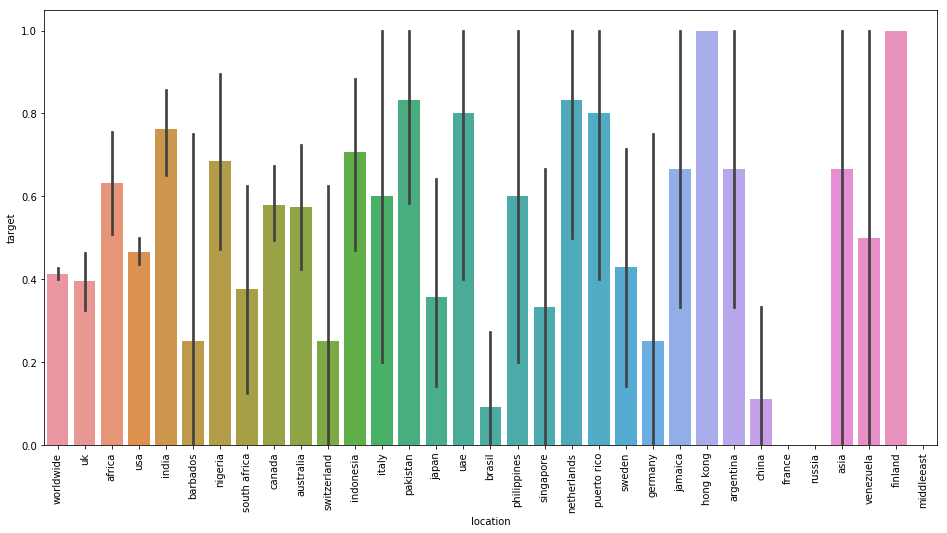

In [17]:
plt.subplots(figsize=(16, 8))

plot=sns.barplot(x="location", y="target", data=alldata_df[:ntrain])

for item in plot.get_xticklabels():
    item.set_rotation(90)

In [18]:
alldata_df['keyword'].value_counts()

upheaval                 50
desolation               50
hostage                  50
collapsed                50
fatal                    50
                         ..
forest%20fire            24
threat                   16
radiation%20emergency    14
inundation               14
epicentre                13
Name: keyword, Length: 221, dtype: int64

In [19]:
alldata_df['keyword'].isnull().sum()

87

In [20]:
alldata_df['keyword'].fillna('None',inplace=True)

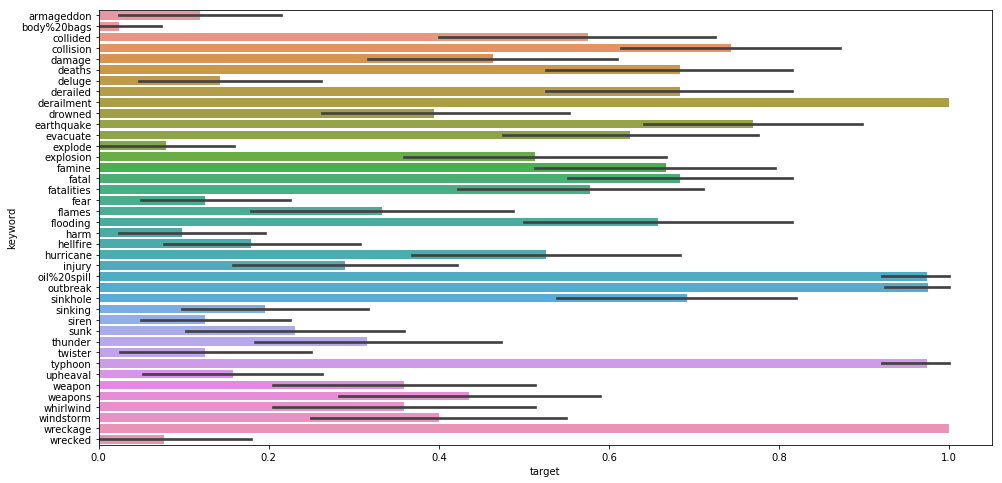

In [21]:
temp=train_df['keyword'].value_counts()[:40].index
plt.subplots(figsize=(16, 8))
plot=sns.barplot(y='keyword',x='target',data=train_df[train_df['keyword'].isin(temp)],
            orient='h')

In [22]:
alldata_df['text']=alldata_df['text'].str.lower()

In [23]:
#cleaning text
alldata_df['text']=alldata_df['text'].apply(lambda x:re.sub('<[^<>]+>','',x))
alldata_df['text']=alldata_df['text'].apply(lambda x:re.sub('[0-9]+', 'number',x))
alldata_df['text']=alldata_df['text'].apply(lambda x:re.sub('(http|https)://[^\s]*', 'httpaddr',x))
alldata_df['text']=alldata_df['text'].apply(lambda x:re.sub('[^\s]+@[^\s]+', 'emailaddr',x))
alldata_df['text']=alldata_df['text'].apply(lambda x:re.sub('[%s]' % re.escape(string.punctuation), '', x))
alldata_df['text']=alldata_df['text'].apply(lambda x:re.sub('\n', '',x))
alldata_df['text']= alldata_df['text'].apply(lambda x:re.sub('\w*\d\w*', '', x))

In [24]:
#tokenization
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
alldata_df['text'] = alldata_df['text'].apply(lambda x: tokenizer.tokenize(x))
alldata_df['text'].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [numbernumber, people, receive, wildfires, eva...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

In [25]:
#nltk.download('stopwords')

In [26]:
from nltk.corpus import stopwords

In [27]:
#stopwords removal

alldata_df['text']=[w for w in alldata_df['text'] if w not in stopwords.words('english')]


In [28]:
#Stemming

stemmer = nltk.stem.PorterStemmer()
alldata_df['text'] = alldata_df['text'].apply(lambda x: [stemmer.stem(y) for y in x])
alldata_df['text'].head()

0    [our, deed, are, the, reason, of, thi, earthqu...
1         [forest, fire, near, la, rong, sask, canada]
2    [all, resid, ask, to, shelter, in, place, are,...
3    [numbernumb, peopl, receiv, wildfir, evacu, or...
4    [just, got, sent, thi, photo, from, rubi, alas...
Name: text, dtype: object

In [29]:
vocabulary=[]
frequencies=[]
for x in alldata_df['text']:
    for y in x:
        if y not in vocabulary: 
            vocabulary.append(y)
            frequencies.append(1)
        else:
            pos=vocabulary.index(y)
            frequencies[pos]=frequencies[pos]+1
            
voc_freq=list(zip(frequencies,vocabulary))        


In [30]:
voc_freq.sort(reverse=True)
frequencies,vocabulary=zip(*voc_freq)
frequencies=np.array(frequencies)
length=len(frequencies[frequencies>=20])
vocabularyList=vocabulary[:length-1]

In [31]:
def returnIndex(lista,vocabularyList):
    indexes=np.zeros(len(vocabularyList))
    tot=len(lista)
    for x in lista:
        if x in vocabularyList:
            pos=vocabularyList.index(x)
            indexes[pos]=indexes[pos]+1/tot
    return indexes

In [32]:
featureLabel=[]

for i in range(len(vocabularyList)):
    featureLabel.append('Feature'+str(i))

In [33]:
alldata_df['Features']=alldata_df['text'].apply(lambda x:returnIndex(x,vocabularyList))

In [34]:
alldata_df.drop(columns=['text'],inplace=True)

In [35]:
alldata_df.head(100)

,keyword,location,target,Features
0,None,worldwide,1.0,"[0.0, 0.07692307692307693, 0.0, 0.0, 0.0, 0.07..."
1,None,worldwide,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,None,worldwide,1.0,"[0.0, 0.0, 0.0, 0.045454545454545456, 0.090909..."
3,None,worldwide,1.0,"[0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.0..."
4,None,worldwide,1.0,"[0.0, 0.0, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
...,...,...,...,...
95,accident,worldwide,1.0,"[0.0, 0.038461538461538464, 0.0, 0.03846153846..."
96,accident,usa,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04545454..."
97,accident,worldwide,1.0,"[0.0, 0.0, 0.047619047619047616, 0.04761904761..."
98,accident,worldwide,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [36]:
temp1=pd.get_dummies(alldata_df[['keyword','location']])
temp2=pd.DataFrame(alldata_df.Features.tolist(), columns=featureLabel)
temp=pd.concat([temp1,temp2],axis=1)
temp.head(10)

,keyword_None,keyword_ablaze,keyword_accident,keyword_aftershock,keyword_airplane%20accident,keyword_ambulance,keyword_annihilated,keyword_annihilation,keyword_apocalypse,keyword_armageddon,...,Feature1124,Feature1125,Feature1126,Feature1127,Feature1128,Feature1129,Feature1130,Feature1131,Feature1132,Feature1133
0,1,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,0,0,0,0,0,0,0,0,0,...,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X=np.array(temp[:ntrain])
Xtest=np.array(temp[ntrain:])
Y=np.array(alldata_df[:ntrain]['target'])
#alldata_df.drop(columns=['target','keyword','location'],inplace=True)

In [38]:
print(temp1.shape)
print(temp2.shape)
print(temp.shape)
print(X.shape)
print(Xtest.shape)

(10876, 255)
(10876, 1134)
(10876, 1389)
(7613, 1389)
(3263, 1389)


In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
svm=SVC(random_state=42,cache_size = 1000)
svm.get_params()

{'C': 1.0,
 'cache_size': 1000,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [40]:
C = [x for x in np.linspace(start = 0.1, stop = 3.0, num = 100,endpoint=False)]
#class_weight= [None,'balanced',dict]
#decision_function_shape=['ovo','ovr']
kernel=['linear', 'poly', 'rbf', 'sigmoid']

random_grid = {'C': C,
               #'class_weight': class_weight,
               #'decision_function_shape': decision_function_shape,
               'kernel': kernel}

In [79]:
svm_random = RandomizedSearchCV(estimator = svm, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [80]:
svm_random.fit(X,Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 59.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 118.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'C': [0.1, 0.129, 0.158, 0.187, 0.216, 0.245, 0.274, 0.303, 0.33199999999999996, 0.361, 0.39, 0.41899999999999993, 0.44799999999999995, 0.477, 0.506, 0.5349999999999999, 0.564, 0.593, 0.622, 0.6509999999999999, 0.6799999999999999, 0.709, 0.7379999999999999, 0.7669999999999999, 0...26, 2.855, 2.884, 2.913, 2.9419999999999997, 2.971], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [81]:
svm_random.best_estimator_

SVC(C=2.971, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [43]:

#param_grid = {
#              'C': [x for x in np.linspace(start = 2.5, stop = 3.0, num = 1,endpoint=False)],
#               #'class_weight': class_weight,
               #'decision_function_shape': decision_function_shape,
#              'kernel': kernel
#}
# Create a based model
#svm = SVC(random_state=42,cache_size = 1000)
# Instantiate the grid search model
#grid_search = GridSearchCV(estimator = svm, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)

In [44]:
#grid_search.fit(X,Y)

In [45]:
#grid_search.best_estimator_

In [46]:
#x_train, x_cval, y_train, y_cval = train_test_split(X, Y, test_size = 0.22, random_state = 0)

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer
param_grid = {
              'C': [x for x in np.linspace(start = 0.01, stop = 15.0, num = 100,endpoint=False)],
               #'class_weight': class_weight,
               #'decision_function_shape': decision_function_shape,
              #'kernel': kernel
}

In [49]:
svm = SVC(random_state=42,cache_size = 1000,kernel='linear')
grid_search = GridSearchCV(estimator = svm, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2,scoring=make_scorer(f1_score))

In [50]:
grid_search.fit(X,Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 82.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.15990000000000001, 0.3098, 0.4597, 0.6096, 0.7595000000000001, 0.9094, 1.0593000000000001, 1.2092, 1.3591, 1.5090000000000001, 1.6589, 1.8088, 1.9587, 2.1086, 2.2584999999999997, 2.4084, 2.5583, 2.7081999999999997, 2.8581, 3.008, 3.1578999999999997, 3.3078, 3.4577, 3.607599...13.501, 13.6509, 13.8008, 13.9507, 14.1006, 14.2505, 14.4004, 14.5503, 14.7002, 14.850100000000001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score), verbose=2)

In [51]:
results=grid_search.cv_results_

In [52]:
grid_search.best_estimator_

SVC(C=14.2505, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

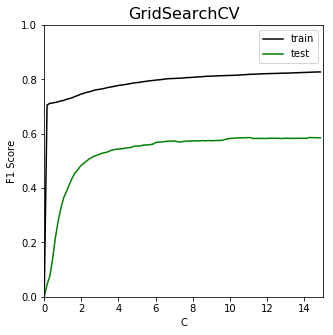

In [59]:
plt.figure(figsize=(5, 5))
plt.title("GridSearchCV",fontsize=16)

plt.xlabel("C")
plt.ylabel("F1 Score")

ax = plt.gca()
ax.set_xlim(0,15)
ax.set_ylim(0, 1)

X_axis = np.array(results['param_C'].data, dtype=float)
for sample, color in (('train', 'k'), ('test', 'g')):
        sample_score_mean = results['mean_%s_score'%sample]
        #sample_score_std = results['std_%s_score'%sample]
        #ax.fill_between(X_axis, sample_score_mean - sample_score_std,sample_score_mean + sample_score_std,alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean,'-', color=color,alpha=1,label="%s" %sample)

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [60]:
test_df

,keyword,location,text
0,NaN,NaN,Just happened a terrible car crash
1,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...
3258,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [66]:
predictions=grid_search.predict(Xtest)

In [67]:
predictions_df=pd.DataFrame({'id':ids,'target':predictions})
predictions_df.to_csv('submission.csv', index=False)